In [77]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_covtype
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.io import arff
import sklearn as sk
import time
from sklearn.datasets import fetch_openml

In [60]:
data = fetch_covtype(as_frame=True)  # Set as_frame=True to get the data as a DataFrame
X = data['data']
y = data['target']

# Combine features and target into one DataFrame
all_df = pd.concat([X, y], axis=1)
all_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [61]:
def remove_files_from_directory(directory):
    # Get all files in the directory
    files = glob.glob(os.path.join(directory, "*"))
    
    # Loop through the files and remove each one
    for file in files:
        if os.path.isfile(file):
            os.remove(file)
    
    print(f"All files in {directory} have been removed.")

In [62]:
normal_target = 2
output_folder = 'csv_files'
target_column = 'Cover_Type'
feature_folder = 'features'

# Create a folder to save the CSVs
remove_files_from_directory(output_folder)
remove_files_from_directory(feature_folder)
os.makedirs(output_folder, exist_ok=True)
os.makedirs(feature_folder, exist_ok=True)

# List of target class names (cover types)
cover_types = {
    1: "Spruce-Fir",
    2: "LodgepolePine",
    3: "PonderosaPine",
    4: "CottonwoodWillow",
    5: "Aspen",
    6: "DouglasFir",
    7: "Krummholz"
}

inv_cover_types = {
    "Spruce-Fir": 1,
    "LodgepolePine": 2,
    "PonderosaPine": 3,
    "CottonwoodWillow": 4,
    "Aspen": 5,
    "DouglasFir": 6,
    "Krummholz": 7,
}

# Loop through each cover type and create a dataset
for label, name in cover_types.items():
    # 30% of the current cover type
    class_data = all_df[all_df[target_column] == label]
    class_sample = class_data.sample(frac=0.30, random_state=42)

    # 70% of normal data (from other cover types)
    normal_data = all_df[all_df[target_column] != label]
    normal_sample = normal_data.sample(n=len(class_sample) * (7 // 3), random_state=42)

    # Combine the class and normal data
    combined_data = pd.concat([class_sample, normal_sample])

    # Save the dataset to CSV
    path = os.path.join(output_folder, f"{name}.csv")
    combined_data.to_csv(path, index=False)
    print(f"{name}.csv created with {len(combined_data)} rows.")

print("All datasets created successfully!")

All files in csv_files have been removed.
All files in features have been removed.
Spruce-Fir.csv created with 190656 rows.
LodgepolePine.csv created with 254970 rows.
PonderosaPine.csv created with 32178 rows.
CottonwoodWillow.csv created with 2472 rows.
Aspen.csv created with 8544 rows.
DouglasFir.csv created with 15630 rows.
Krummholz.csv created with 18459 rows.
All datasets created successfully!


In [6]:
print(all_df.head())
print(all_df[target_column].mode())
print(data.feature_names)

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0   

In [63]:
# Assuming `X` and `y` are defined from all_df
X = all_df.drop(columns=[target_column])
y = all_df[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(464809, 54) (116203, 54) (464809,) (116203,)


In [64]:
def get_anomaly_X_y_from_csv(csv_file, main_labels):
    df=pd.read_csv(os.path.join(output_folder, csv_file),usecols=main_labels)
    df=df.fillna(0)
    anomaly_or_not=[]
    for i in df[target_column]: #it changes the normal label to "1" and the anomaly tag to "0" for use in the machine learning algorithm
        if i == normal_target:
            anomaly_or_not.append(1)
        else:
            anomaly_or_not.append(0)           
    df[target_column]=anomaly_or_not

    y = df[target_column].values
    del df[target_column]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
    # print('X', type(X), X)
    # print('y', type(y), y)
    return (X, y, df)

csv_files ['Krummholz.csv', 'CottonwoodWillow.csv', 'DouglasFir.csv', 'Aspen.csv', 'LodgepolePine.csv', 'Spruce-Fir.csv', 'PonderosaPine.csv']
csv file Krummholz.csv
importances [4.69103594e-01 3.54740540e-02 2.73411296e-02 6.03585007e-02
 4.25016936e-02 8.58271678e-02 3.03013179e-02 4.85416289e-02
 2.99801560e-02 7.89279851e-02 5.35151695e-03 3.51536009e-03
 3.72403485e-03 5.10351586e-04 3.38258873e-05 7.82330384e-03
 3.46789668e-04 1.08265806e-02 8.04108988e-07 4.85909081e-04
 5.10998987e-06 0.00000000e+00 1.87805809e-04 1.03291754e-03
 1.57547133e-03 1.40712365e-03 1.95761332e-03 6.42695053e-07
 0.00000000e+00 8.93825992e-04 1.19160030e-03 2.80376433e-05
 1.11946883e-03 1.63534916e-03 3.29719059e-04 7.82010512e-03
 7.06124060e-03 3.60165047e-03 1.73828530e-04 2.37750735e-04
 7.90178088e-04 5.09042205e-05 5.37329747e-03 1.79106636e-03
 5.07662914e-03 8.94166556e-03 4.97266860e-03 3.51478856e-04
 9.37832794e-06 0.00000000e+00 0.00000000e+00 5.03261516e-04
 6.40098411e-04 2.64408811e-0

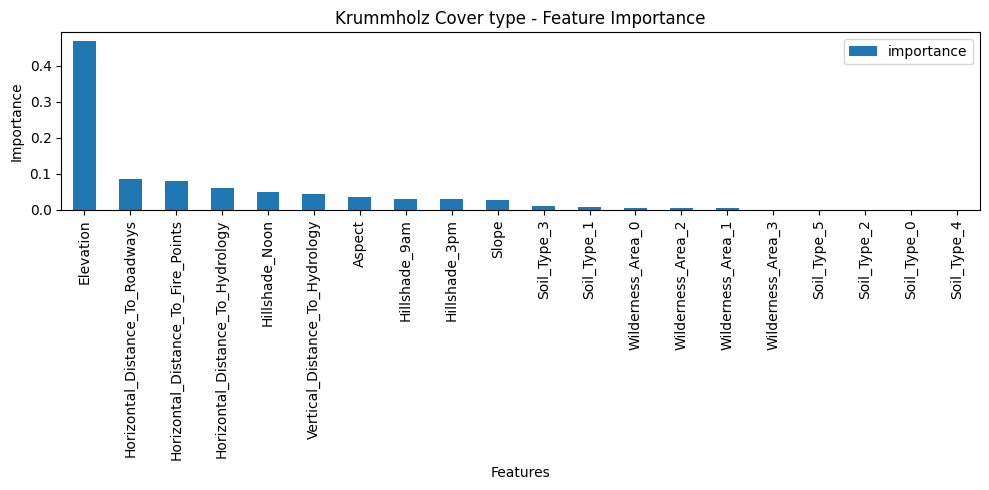

-----------------------------------------------------------------------------------------------




csv file CottonwoodWillow.csv
importances [5.00189035e-01 4.08962397e-02 2.96858254e-02 4.69514639e-02
 4.51560499e-02 8.21234372e-02 4.00780086e-02 4.28522286e-02
 3.52860145e-02 6.32952287e-02 6.60201558e-03 2.83855448e-03
 5.70674964e-03 2.74569185e-04 0.00000000e+00 1.92351461e-03
 3.12874712e-04 5.35688398e-03 1.22491677e-04 3.82471101e-04
 0.00000000e+00 0.00000000e+00 4.65042765e-05 1.96808410e-03
 1.41766509e-03 1.51829793e-03 1.99338210e-03 9.96909610e-06
 0.00000000e+00 5.76051345e-04 1.12384253e-03 3.51732189e-05
 6.80067074e-04 1.40023149e-03 3.52452819e-04 4.75787786e-03
 3.15846471e-03 4.07206451e-03 3.17259130e-05 5.81498055e-04
 2.13112420e-04 3.56286820e-05 3.38990514e-03 1.91112274e-03
 2.59515460e-03 1.26075325e-02 4.02769722e-03 6.06317883e-04
 1.33363756e-05 0.00000000e+00 0.00000000e+00 2.63365678e-04
 4.19071297e-04 1.60746501e-04] CottonwoodWillow
important_featur

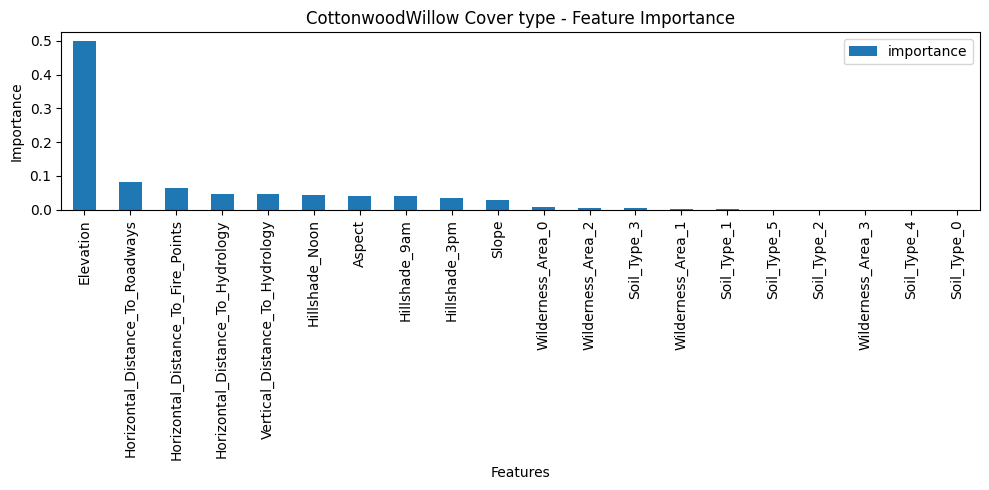

-----------------------------------------------------------------------------------------------




csv file DouglasFir.csv
importances [4.01079721e-01 4.36302041e-02 2.75936570e-02 5.30179171e-02
 4.91659259e-02 1.02660696e-01 3.27797857e-02 4.06605603e-02
 3.33874900e-02 9.14906450e-02 3.64760584e-02 3.31056738e-03
 1.61187486e-02 1.12254216e-03 1.21119190e-05 1.38596737e-03
 1.60998363e-03 1.40409449e-03 8.92815029e-06 4.54867470e-04
 0.00000000e+00 9.54355986e-05 1.88557625e-04 3.33975838e-03
 5.52866078e-03 1.12719914e-03 4.90290130e-03 2.66732852e-06
 0.00000000e+00 9.62317629e-04 8.41844430e-04 8.01876106e-06
 1.31738070e-03 1.44195724e-03 6.99024011e-04 5.52882075e-03
 8.19269958e-03 4.24392081e-03 1.00472330e-04 1.48559201e-04
 7.21212595e-04 6.23590000e-04 5.27402382e-03 1.63517639e-03
 3.67430639e-03 5.50479625e-03 4.24545527e-03 1.12425010e-03
 4.52061353e-06 1.47819190e-04 0.00000000e+00 2.96396431e-04
 3.97719410e-04 3.10065812e-04] DouglasFir
important_features ['Elevati

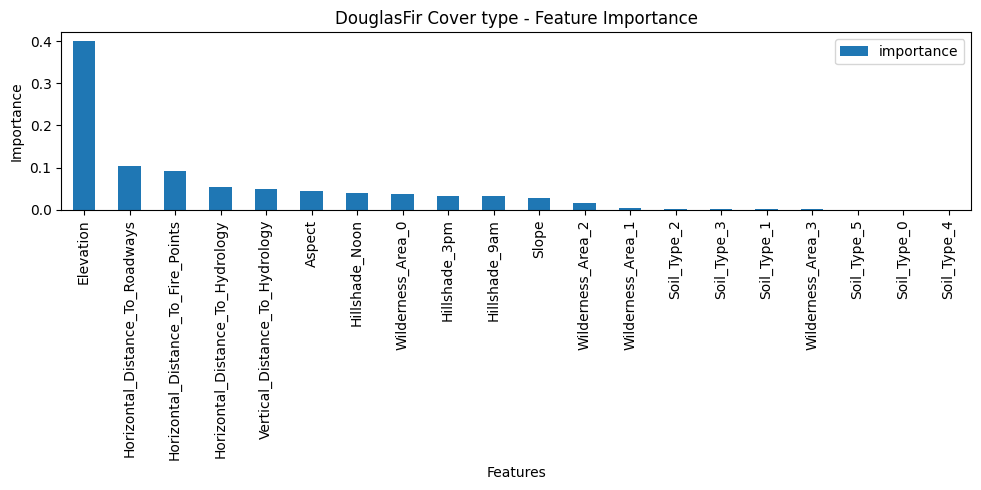

-----------------------------------------------------------------------------------------------




csv file Aspen.csv
importances [1.80865305e-01 5.56792203e-02 3.72767835e-02 7.50648813e-02
 5.79594540e-02 1.60446048e-01 4.84928237e-02 5.89653654e-02
 4.68963943e-02 1.09607144e-01 5.97463037e-03 1.36888807e-03
 7.87376595e-03 4.87593821e-04 1.53982509e-05 8.78230529e-04
 1.18572767e-03 4.21475901e-03 2.45952089e-06 1.97066044e-04
 0.00000000e+00 1.72445932e-06 1.55532709e-03 3.75816105e-03
 2.72831576e-03 4.89141688e-02 5.90590244e-03 0.00000000e+00
 0.00000000e+00 8.91177024e-04 1.03227024e-03 1.35206588e-04
 5.99990190e-04 2.60078069e-03 1.05196643e-04 4.67867009e-03
 1.08728815e-02 6.56386692e-03 3.98785852e-05 1.04101316e-03
 1.08004904e-03 4.38780038e-04 2.78364045e-02 4.21669218e-03
 5.98725666e-03 6.51074024e-03 6.24799311e-03 1.52590893e-03
 2.75006594e-06 1.40544950e-04 0.00000000e+00 2.40524811e-04
 5.41085983e-04 3.54799827e-04] Aspen
important_features ['Elevation', 'Hori

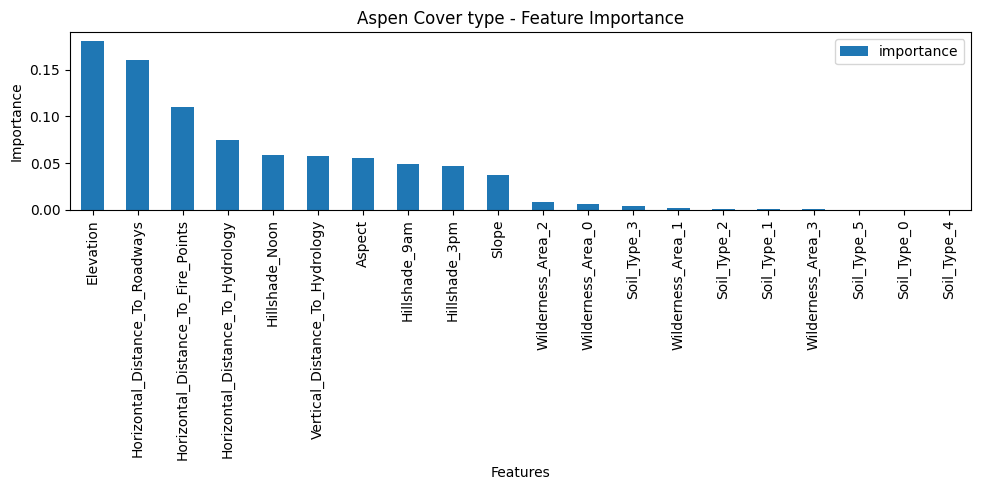

-----------------------------------------------------------------------------------------------




csv file LodgepolePine.csv
importances [3.01595651e-01 3.42007639e-02 2.17704628e-02 6.58004289e-02
 5.23832767e-02 1.50329243e-01 3.12900301e-02 4.14019534e-02
 2.84367394e-02 1.43581218e-01 8.81622048e-03 2.70254613e-03
 8.49901748e-03 8.45678081e-04 7.64180715e-06 9.38997805e-03
 4.07438545e-04 9.23999539e-03 2.78173540e-06 1.75062214e-04
 1.18732854e-06 5.99838973e-05 3.26222429e-04 3.73763271e-03
 2.22931317e-03 1.51925685e-02 3.82875340e-03 3.07568545e-07
 0.00000000e+00 1.10830978e-03 1.27188582e-03 1.01929053e-05
 1.01863445e-03 1.91545607e-03 2.04558657e-04 6.47171453e-03
 9.37065950e-03 5.82690021e-03 1.00134027e-04 3.37568521e-04
 1.35471213e-03 2.43874528e-04 6.66237474e-03 3.63169722e-03
 6.60530087e-03 9.89944636e-03 6.00223217e-03 6.75035660e-04
 6.63186514e-06 1.17385360e-04 0.00000000e+00 2.35070402e-04
 4.06946767e-04 2.71181328e-04] LodgepolePine
important_features ['E

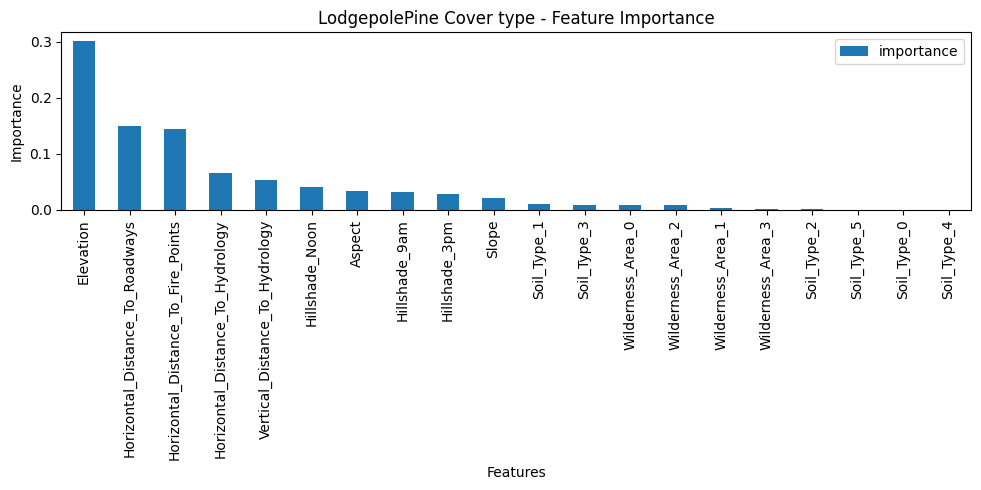

-----------------------------------------------------------------------------------------------




csv file Spruce-Fir.csv
importances [3.40364611e-01 3.23668199e-02 2.15772710e-02 6.16269744e-02
 4.70714683e-02 1.38857828e-01 3.30506039e-02 4.14199650e-02
 2.84815725e-02 1.34454915e-01 7.17772640e-03 4.03081575e-03
 7.37876679e-03 9.79165466e-04 1.29647731e-05 1.11645160e-02
 4.21203390e-04 1.09764277e-02 4.47189710e-06 1.76023420e-04
 3.27533841e-07 6.53055577e-05 1.40861414e-04 3.78469940e-03
 1.68682903e-03 5.39776146e-03 3.58903978e-03 3.23423144e-07
 0.00000000e+00 1.17126030e-03 1.42201849e-03 3.35472679e-05
 8.57797751e-04 2.14734389e-03 3.52330883e-04 6.15934361e-03
 8.63410064e-03 5.25503761e-03 4.25451657e-05 1.50137722e-04
 1.13008691e-03 2.15283741e-04 7.17569172e-03 3.23029517e-03
 6.25308015e-03 1.14261015e-02 6.03825733e-03 1.64445590e-04
 2.02803842e-05 3.62834254e-05 0.00000000e+00 2.81313764e-04
 1.08976842e-03 4.54390563e-04] Spruce-Fir
important_features ['Elevati

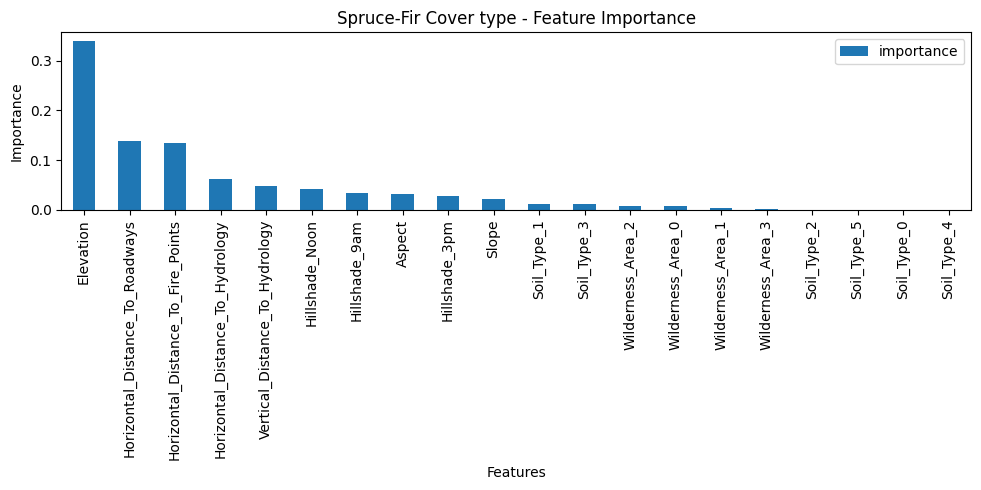

-----------------------------------------------------------------------------------------------




csv file PonderosaPine.csv
importances [3.68174228e-01 3.60827007e-02 2.53891111e-02 5.42150855e-02
 4.44661312e-02 1.01996458e-01 2.98301131e-02 4.23819693e-02
 2.90181914e-02 9.39830995e-02 3.30784235e-02 2.77717498e-03
 4.14216936e-03 6.57752569e-04 1.36009811e-06 3.08943446e-02
 1.28668680e-03 3.16511716e-02 1.67111668e-06 1.62170109e-04
 4.08691534e-06 7.40573283e-05 4.03492950e-04 3.76891900e-03
 4.58099332e-03 5.92391505e-03 2.29582899e-03 8.00029859e-07
 0.00000000e+00 4.37500081e-04 1.04103789e-03 1.04532928e-05
 8.23641185e-04 1.87810746e-03 4.72109740e-04 7.84505847e-03
 6.55868285e-03 5.50418716e-03 2.05803869e-05 2.76728283e-04
 6.90679938e-04 1.61509001e-04 6.47255030e-03 2.03213386e-03
 4.45944867e-03 7.32775308e-03 4.75930276e-03 6.67859728e-04
 1.55870489e-05 1.68105050e-04 0.00000000e+00 3.07226037e-04
 5.37256341e-04 2.90395684e-04] PonderosaPine
important_features ['E

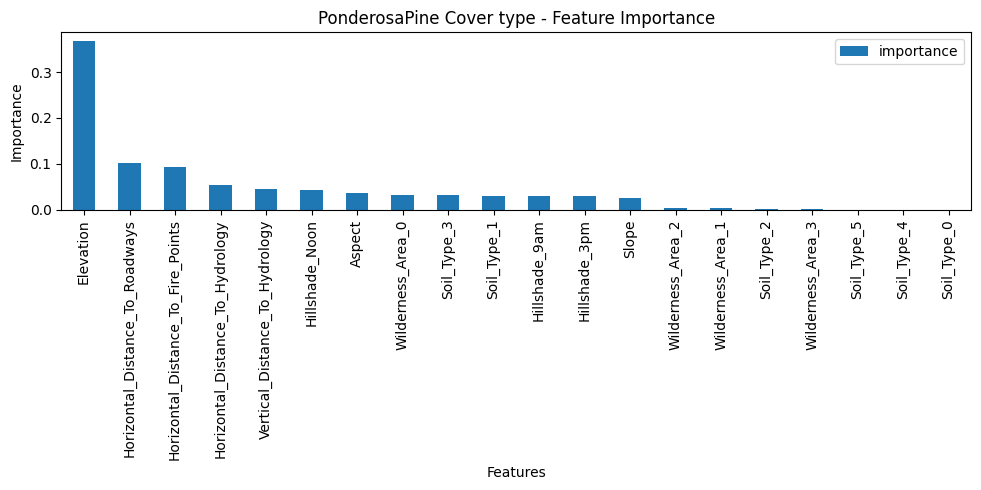

-----------------------------------------------------------------------------------------------




feature_importances {'Krummholz': ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon'], 'CottonwoodWillow': ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 'DouglasFir': ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 'Aspen': ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon'], 'LodgepolePine': ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 'Spruce-Fir': ['Elevation', 'Horizontal_Distance

In [65]:
seconds = time.time()

# CSV files names:
csv_files=os.listdir(output_folder)# It creates a list of file names in the "attacks" folder.
print('csv_files',csv_files)

# Headers of column
main_labels=data.feature_names[:]
main_labels.append(target_column)

ths = open("importance_list.csv", "w")
feature_importances = {}
SVMs = {}
for csv_file in csv_files:
    print('csv file', csv_file)
    
    X, y, df = get_anomaly_X_y_from_csv(csv_file, main_labels)

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    label = csv_file.split(".")[0]
    print('importances', importances, label)
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False)
    important_features = impor_bars['Features'].to_list()[:5]
    impor_bars = impor_bars.set_index('Features')
    print('important_features', important_features)
    feature_importances[label] = important_features

    svm = SVC()
    X_train_class = df.iloc[:, df.columns.get_indexer(important_features)]
    # print('X_train_class', X_train_class)
    y_train_class = y
    # print('y_train_class', y_train_class)
    if len(y_train_class) > 0:  # Ensure there are samples for this class
        svm.fit(X_train_class, y_train_class)
    else:
        print(f'no data for {label}')
    SVMs[label] = svm

    
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=label+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(label,"importance list:")
    print(label,"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(label+" Cover type - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig(os.path.join(feature_folder, label+".pdf"),bbox_inches='tight', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print('feature_importances', feature_importances)
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()



In [98]:
TEST_COUNT = 100

# Step 1: Train KNN to classify
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 2: Predict classes for the test set
knn_predictions = knn.predict(X_test[:TEST_COUNT])
print('knn_predictions', knn_predictions)

knn_predictions [1 2 2 2 2 3 2 1 2 2 2 1 5 2 2 1 2 5 3 2 1 2 2 1 6 1 1 2 1 2 1 2 2 3 2 2 2
 2 2 1 2 1 1 2 2 1 2 1 7 2 1 1 6 2 1 1 7 2 2 2 2 1 1 2 2 2 3 2 2 1 5 1 2 3
 1 3 1 1 1 2 2 1 2 2 2 1 1 3 1 2 1 1 2 1 3 3 2 2 1 1]


In [107]:
y_test = y_test[:TEST_COUNT]
print("KNN Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))

KNN Evaluation:
Confusion Matrix:
[[33  1  0  0  0  0]
 [ 3 47  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]
[[33  1  0  0  0  0]
 [ 3 47  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.97      0.94        34
           2       0.98      0.94      0.96        50
           3       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.96      0.96      0.96       100

Accuracy: 0.96


In [105]:
svm_predictions = []

for i in range(len(X_test)):
    test_instance = X_test[i].reshape(1, -1)
    predicted_label = cover_types[knn_predictions[i]]
    # print('predicted_label', predicted_label)
    selected_features = feature_importances[predicted_label]
    # print('selected_features', selected_features)
    svm_model = SVMs[predicted_label]
    
    # Select features for the SVM
    dd = all_df.drop(columns=[target_column])
    # test_instance_selected = test_instance[:, dd.columns.get_indexer(selected_features)]
    # print('dd.columns.get_indexer(selected_features)', dd.columns.get_indexer(selected_features))
    test_instance_selected = pd.DataFrame(
        test_instance[:, all_df.columns.get_indexer(selected_features)], 
        columns=selected_features
    )
    # print('test_instance_selected', test_instance_selected)
    
    svm_prediction = svm_model.predict(test_instance_selected)
    print((svm_prediction, inv_cover_types[predicted_label], y_test[i]))
    svm_predictions.append((svm_prediction, inv_cover_types[predicted_label], y_test[i]))
# print(svm_predictions)

(array([0]), 1, np.int32(1))
(array([0]), 2, np.int32(2))
(array([1]), 2, np.int32(2))
(array([1]), 2, np.int32(2))
(array([1]), 2, np.int32(2))
(array([0]), 3, np.int32(3))
(array([1]), 2, np.int32(2))
(array([0]), 1, np.int32(1))
(array([0]), 2, np.int32(2))
(array([0]), 2, np.int32(2))
(array([1]), 2, np.int32(2))
(array([0]), 1, np.int32(1))
(array([0]), 5, np.int32(5))
(array([0]), 2, np.int32(2))
(array([0]), 2, np.int32(2))
(array([1]), 1, np.int32(1))
(array([0]), 2, np.int32(2))
(array([0]), 5, np.int32(5))
(array([0]), 3, np.int32(3))
(array([0]), 2, np.int32(2))
(array([0]), 1, np.int32(1))
(array([1]), 2, np.int32(2))
(array([1]), 2, np.int32(2))
(array([1]), 1, np.int32(1))
(array([0]), 6, np.int32(6))
(array([0]), 1, np.int32(1))
(array([1]), 1, np.int32(1))
(array([0]), 2, np.int32(2))
(array([0]), 1, np.int32(1))
(array([1]), 2, np.int32(2))
(array([1]), 1, np.int32(1))
(array([0]), 2, np.int32(2))
(array([1]), 2, np.int32(2))
(array([0]), 3, np.int32(3))
(array([0]), 2

In [106]:
# Now evaluate SVM predictions only for the anomalies detected by KNN
# Create a mask for test instances that KNN classified as anomalies
anomaly_mask = knn_predictions != normal_target  # Assuming normal_target is your normal class
anomaly_mask = anomaly_mask[:TEST_COUNT]
print('anomaly_mask', len(anomaly_mask), type(anomaly_mask))

# Get true labels and predictions for anomalies
svm_predictions_actual = [t[1] for t in svm_predictions]
print('svm_predictions_actual', len(svm_predictions_actual), type(svm_predictions_actual))
svm_predictions_actual = np.array(svm_predictions_actual)
print('svm_predictions_actual', svm_predictions_actual)
y_test_anomalies = y_test[anomaly_mask]
svm_predictions_anomalies = svm_predictions_actual[anomaly_mask]

# Evaluate SVM only on the anomalies
print("\nSVM Evaluation (for anomalies):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_anomalies, svm_predictions_anomalies))
print("\nClassification Report:")
print(classification_report(y_test_anomalies, svm_predictions_anomalies))
print("Accuracy:", accuracy_score(y_test_anomalies, svm_predictions_anomalies))

anomaly_mask 100 <class 'numpy.ndarray'>
svm_predictions_actual 100 <class 'list'>
svm_predictions_actual [1 2 2 2 2 3 2 1 2 2 2 1 5 2 2 1 2 5 3 2 1 2 2 1 6 1 1 2 1 2 1 2 2 3 2 2 2
 2 2 1 2 1 1 2 2 1 2 1 7 2 1 1 6 2 1 1 7 2 2 2 2 1 1 2 2 2 3 2 2 1 5 1 2 3
 1 3 1 1 1 2 2 1 2 2 2 1 1 3 1 2 1 1 2 1 3 3 2 2 1 1]

SVM Evaluation (for anomalies):
Confusion Matrix:
[[33  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        33
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        52
   macro avg       0.82      0.83      0.83        52


/Users/suyeetan/Downloads/Anomaly-Detection-in-Networks-Using-Machine-Learning/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/Anomaly-Detection-in-Networks-Using-Machine-Learning/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/Anomaly-Detection-in-Networks-Using-Machine-Learning/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 

In [41]:
# for label, name in cover_types.items():
#     # Get feature importances for the current class from the Random Forest model
#     # df_class = all_df[all_df[target_column] == label]
#     # Compute feature importances as before and select top features
#     # Assuming `top_features` contains the selected feature names for the current class
#     # top_features = df_class.columns[df_class.columns.isin(impor_bars.index[:5])]  # Adjust as needed
    
#     # Train SVM using only the selected features for the current class
#     svm = SVC()
#     X_train_class = X_train[y_train == label][:, df.columns.get_indexer(feature_importance)]
#     y_train_class = y_train[y_train == label]
    
#     if len(y_train_class) > 0:  # Ensure there are samples for this class
#         svm.fit(X_train_class, y_train_class)

#     # Store the model for later use
#     feature_importance[label] = (svm, top_features)

NameError: name 'df_class' is not defined

In [2]:
!pip3 install aeon

Looking in indexes: https://bytedpypi.byted.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.6 MB/s eta 0:00:002.5 MB/s eta 0:00:01
  Using cached https://bytedpypi.byted.org/packages/deprecated/Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.4 MB/s eta 0:00:000:00:01m eta 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.8 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 4.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached https://bytedpypi.byted.org/packages/wrapt/wrapt-1.16.0-cp311-cp311-macosx_11_0_arm64.whl (38 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached https:/

In [7]:
from aeon.datasets import load_anomaly_detection
extract_path="./"
gen = load_anomaly_detection(("Genesis", "genesis-anomalies"), extract_path=extract_path, return_metadata=True)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>